In [270]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import os
from __future__ import absolute_import, division, print_function, unicode_literals

np.random.seed(18)

In [180]:
classes = ['bro', 'kro', 'par', 'pte', 'rex', 'ste', 'tri']
class_nums = {
    'bro' : 0, 
    'kro': 1, 
    'par' : 2, 
    'pte': 3, 
    'rex': 4, 
    'ste' : 5, 
    'tri' : 6
}
dataset = []

for c in classes:
    path = 'images/'+ c + '/' + c +'_'
    going = True
    count = 0
    while going:
        image_path = path + str(count) + '.jpeg'

        if not os.path.isfile(image_path):
            going = False 
            break
        
        image = Image.open(image_path)
        
        # Convert the image to grayscale
        gray_image = image.convert('L')

        # Convert the grayscale image to a NumPy array
        image_array = np.array(gray_image)

        # Threshold the image to get a binary image
        threshold = 128
        binary_image = (image_array > threshold).astype(np.uint8)

        dataset.append([binary_image, c])
        count += 1

np.random.shuffle(dataset)

In [181]:
# get train-valid data
train_num = int(len(dataset) * 0.75)
train_data = dataset[0:train_num]
valid_data = dataset[train_num:]
x_train = np.array([np.array(d[0]) for d in train_data])
y_train = np.array([class_nums[d[1]] for d in train_data])
x_test = np.array([d[0] for d in valid_data])
y_test = np.array([class_nums[d[1]] for d in valid_data])

In [ ]:
# import new dataset



In [268]:
def create_model(lr):
  ''' 
  neural network model
  returns model
  '''
  model = tf.keras.models.Sequential()
  # Flatten 2d array into 1d array
  model.add(tf.keras.layers.Flatten(input_shape=(200, 200)))

  # LAYERS #
  model.add(tf.keras.layers.Dense(units=32, activation='leaky_relu'))
  model.add(tf.keras.layers.Dropout(rate=0.1))
  model.add(tf.keras.layers.Dense(units=32, activation='leaky_relu'))
  model.add(tf.keras.layers.Dropout(rate=0.1))


  # new
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.1))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.1))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))

  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))   

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    

def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
  
  # fit mdl
  history = model.fit(
    x=train_features, y=train_label, 
    batch_size=batch_size, epochs=epochs, 
    shuffle=True , validation_split=validation_split)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  return epochs, hist

In [269]:
# hyperparams
lr =0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Training model
mdl = create_model(lr)
epochs, hist = train_model(mdl, x_train, y_train, 
                        epochs, batch_size, validation_split)

# Test performance
print("\n\nTEST performance = ")
mdl.evaluate(x=x_test, y=y_test, batch_size=batch_size)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0650 - loss: 2.2923 - val_accuracy: 0.2903 - val_loss: 2.5188
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.2358 - loss: 2.5251 - val_accuracy: 0.2581 - val_loss: 2.1665
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2520 - loss: 2.0258 - val_accuracy: 0.2903 - val_loss: 2.1347
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.2439 - loss: 1.9782 - val_accuracy: 0.3871 - val_loss: 2.0691
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3740 - loss: 1.8436 - val_accuracy: 0.3871 - val_loss: 1.9467
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.3577 - loss: 1.7324 - val_accuracy: 0.3871 - val_loss: 1.8214
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.3902 - loss: 1.5581 - val_accuracy: 0.4194 - val_loss: 1.7246
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4228 - loss: 1.4197 - val_accuracy: 0.4516 - val_loss: 1.6577
Ep

[3.201432228088379, 0.5769230723381042]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5337 - loss: 2.6123 
Test accuracy: 0.5192307829856873


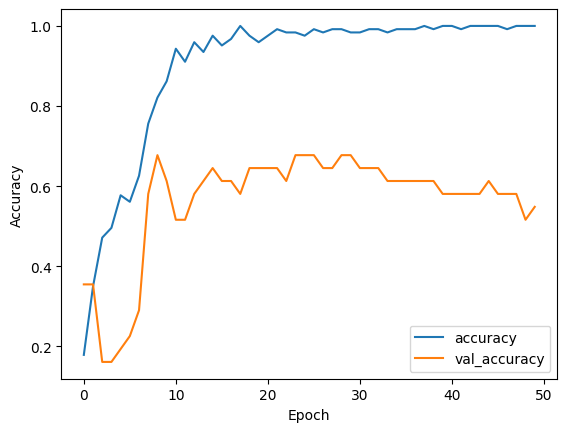

In [222]:
def plot_curve(history):
    plt.figure()
    plt.plot(history['accuracy'], label='accuracy')
    plt.plot(history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')


mdl = create_model(lr)
epochs, hist = train_model(mdl, x_train, y_train, 
                            epochs, batch_size, validation_split)
plot_curve(hist)

# Evaluate the model
loss, accuracy = mdl.evaluate(x=x_test, y=y_test)
print(f"Test accuracy: {accuracy}")

In [223]:
# Test performance
print("TEST performance = ")
mdl.evaluate(x=x_test, y=y_test, batch_size=batch_size)

TEST performance = 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5192 - loss: 2.6062


[2.6062047481536865, 0.5192307829856873]

In [198]:
# to do: rotate images